In [1]:
from pylab import *
from visualize_percolation_cluster import visualize_percolation_cluster as P
from visualize_percolation_cluster import Percolation_Cluster

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = (12, 8)

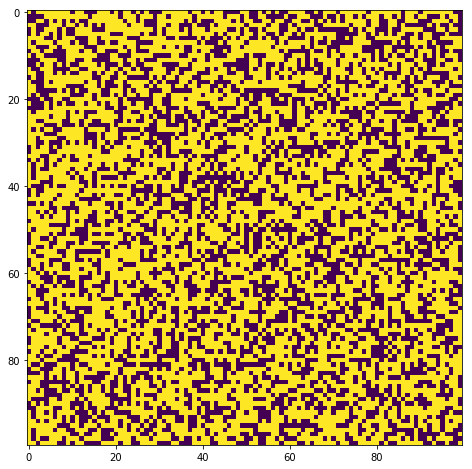

In [3]:
L = 100
p = 0.6

P = Percolation_Cluster(p, L)
P.visualize()
lw, num = P.get_labels()

In [4]:
num

257

In [5]:
lw[:10, :10]

array([[ 1,  0,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 0,  0,  0,  0,  2,  2,  2,  2,  2,  2],
       [ 0,  0, 14, 14,  0,  2,  0,  2,  0,  2],
       [ 2,  2,  0,  0,  0,  2,  2,  2,  0,  2],
       [ 0,  2,  0,  0,  2,  2,  2,  0,  2,  0],
       [ 0,  2,  0,  2,  2,  0,  2,  0,  2,  0],
       [ 2,  2,  2,  2,  0,  0,  2,  0,  2,  2],
       [ 2,  0,  2,  2,  2,  2,  0,  2,  2,  2],
       [ 2,  2,  0,  0,  0,  2,  2,  0,  2,  2],
       [ 0,  2,  2,  0,  2,  2,  0,  0,  0,  2]], dtype=int32)

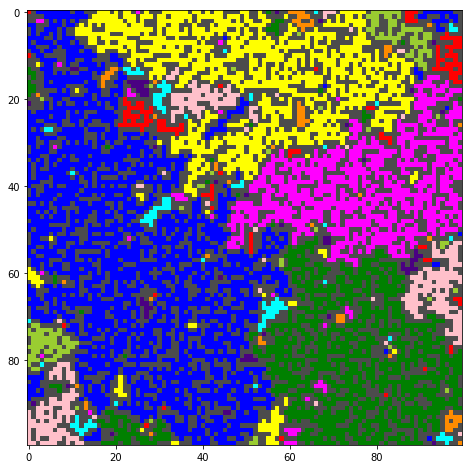

In [6]:
label_img = P.visualize_label()